In [1]:
from mnelab.io.xdf import read_raw_xdf    
from pyxdf import match_streaminfos, resolve_streams
import pyxdf

In [20]:
import datalad as dl

In [30]:
l =


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
xdf_path ="/home/recorder/projects/2024FreeViewingMSCOCO/sub-010/ses-001/eeg/sub-010_ses-001_task-Default_run-001_eeg.xdf"
streams = resolve_streams(xdf_path)
fs_new = 1000

stream_id = match_streaminfos(streams, [{"type": "EEG"}])[0]
        


In [4]:
data, header = pyxdf.load_xdf(xdf_path)

In [5]:
data[0]["info"]["segments"]

[(0, 1257)]

In [6]:
data[2]["info"]["segments"]

[(0, 7399344)]

In [7]:
import align

In [8]:
import numpy as np
np.diff(data[0]["time_stamps"])

array([1.38056292, 5.00190821, 2.70434878, ..., 0.83243086, 1.43970179,
       5.0017813 ])

In [9]:
max_srate = max([stream["nominal_srate"] for stream in streams])
out = align.align_streams([data[2]],sampling_rate = max_srate)

Stream # 1  has  1 segments
0 : from index  0 to  7399345


KeyboardInterrupt: 

In [33]:
data[2]['time_series']

array([[ -20492.88,  -22000.2 ,  -19097.88, ...,  -10976.88,  -13798.8 ,
         681770.  ],
       [ -20490.24,  -22000.92,  -19095.6 , ...,  -10979.64,  -13798.8 ,
         681771.  ],
       [ -20491.08,  -22000.56,  -19098.84, ...,  -10979.52,  -13797.84,
         681772.  ],
       ...,
       [ -19037.16,  -21880.44,  -20400.12, ...,  -10710.48,  -14481.24,
        8081112.  ],
       [ -19042.08,  -21883.32,  -20403.84, ...,  -10730.04,  -14484.72,
        8081113.  ],
       [ -19039.08,  -21876.36,  -20402.16, ...,  -10727.64,  -14471.4 ,
        8081114.  ]], dtype=float32)

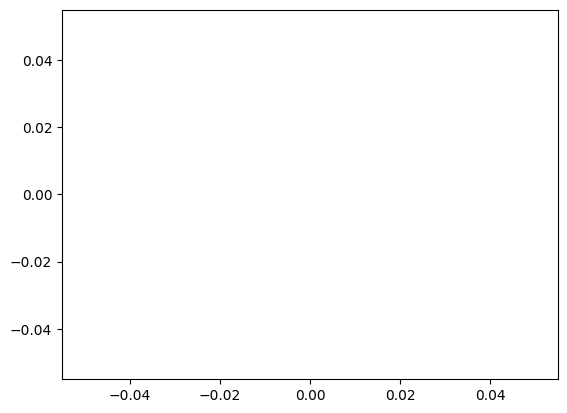

In [11]:
from matplotlib import pyplot as plt 
plt.plot(out[0][131,0:1000],'o')

In [39]:
info = mne.create_info(3, max_srate, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)

array([ 9616.49077289,  9616.49177289,  9616.49277289, ...,
       17015.48890312, 17015.48990312, 17015.49090312])

In [38]:
import numpy as np
out[0][:,130]

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [25]:

srates


1000.0

In [4]:
max_srate = max([stream["nominal_srate"] for stream in streams])

raw = read_raw_xdf(xdf_path,stream_ids=[stream_id],fs_new=max_srate)

Creating RawArray with float64 data, n_channels=129, n_times=7399001
    Range : 0 ... 7399000 =      0.000 ...  7399.000 secs
Ready.


In [12]:
raw.filenames = tuple( Path(p) for p in raw.filenames)

In [9]:
from pathlib import Path

In [13]:
raw.export("/tmp/test.set")